## 2. Das Integral als orientierter Flächeninhalt

#### 2.1 exakte Bestimmung von Flächeninahlten

**Beispiel:**

- $f(x)=x^2$
- Gesucht ist der Flächeninhalt unter dem Funktionsgraphen von $f$ auf dem Intervall $I=[0, 2]$


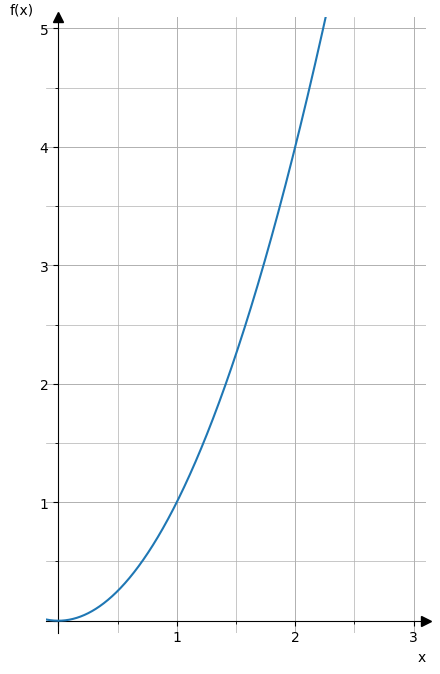

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# Defintionsmenge und Funktion
# ----------------------------
a= -0.1 # untere x-Intervallgrenze 
b= 3.1 # obere x-Intervallgrenze
c = -0.1# untere y-Intervallgrenze
d = 5.1 # obere y-Intervallgrenze
x = np.linspace(a, b,1000)
y1=x**2
# ----------------------------

# Einstellung des Graphen
fig=plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1, aspect =1)

# Definiton der Haupteinheiten, reele Zahlen ohne die 0 
def major_tick(x, pos):
    if x==0:
        return ""
    return int(x)

# Achsenskalierung
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_formatter(FuncFormatter(major_tick))
ax.yaxis.set_major_formatter(FuncFormatter(major_tick))

# Position der Achsen im Schaubild
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')

# Pfeile für die Achsen
ax.plot((1),(0), ls="", marker= ">", ms=7, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0),(1), ls="", marker= "^", ms=7, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

# Achsenlänge und Beschriftung
ax.set_xlim(a,b)
ax.set_ylim(c, d)
ax.set_xlabel("x", loc="right")
ax.set_ylabel("f(x)", loc="top", rotation=0)

# Kästchen
ax.grid(linestyle="-", which="major",linewidth=0.7, zorder=-10)
ax.grid(linestyle="-", which="minor",linewidth=0.5, zorder=-10)

# Plot der Funktion
ax.plot(x,y1, zorder=10)
#plt.show()

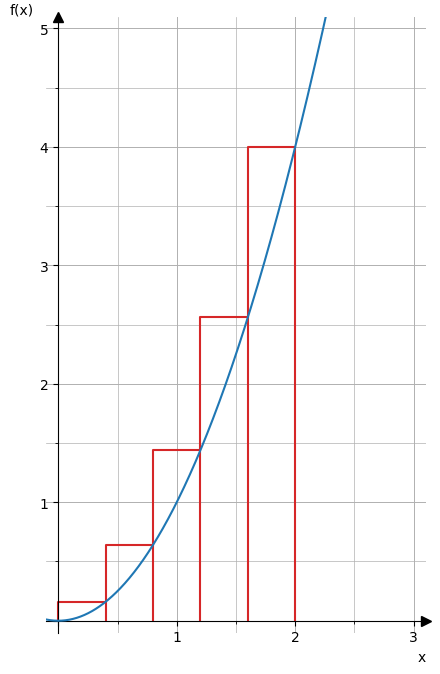

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# Defintionsmenge und Funktion
# ----------------------------
a= -0.1 # untere x-Intervallgrenze 
b= 3.1 # obere x-Intervallgrenze
c = -0.1# untere y-Intervallgrenze
d = 5.1 # obere y-Intervallgrenze
x = np.linspace(a, b,1000)
y1=x**2

def f(x):
    return x**2

n= 6
xi=np.linspace(0,2,n)
yi=f(x)
oben=np.zeros(n)
for i in range(len(oben)-1): 
    cx = np.linspace(xi[i], xi[i+1], 50)
    cy = f(cx)
    oben[i+1] = np.max(cy)
 
oben[0] = yi[0]   

# ----------------------------

# Einstellung des Graphen
fig=plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1, aspect =1)

# Definiton der Haupteinheiten, reele Zahlen ohne die 0 
def major_tick(x, pos):
    if x==0:
        return ""
    return int(x)

# Achsenskalierung
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_formatter(FuncFormatter(major_tick))
ax.yaxis.set_major_formatter(FuncFormatter(major_tick))

# Position der Achsen im Schaubild
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')

# Pfeile für die Achsen
ax.plot((1),(0), ls="", marker= ">", ms=7, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0),(1), ls="", marker= "^", ms=7, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

# Achsenlänge und Beschriftung
ax.set_xlim(a,b)
ax.set_ylim(c, d)
ax.set_xlabel("x", loc="right")
ax.set_ylabel("f(x)", loc="top", rotation=0)

# Kästchen
ax.grid(linestyle="-", which="major",linewidth=0.7, zorder=-10)
ax.grid(linestyle="-", which="minor",linewidth=0.5, zorder=-10)

# Plot der Funktion
ax.plot(x,y1, zorder=10)
plt.plot(xi, oben, drawstyle='steps-pre', color='C3')
plt.vlines(xi, ymin=0, ymax=oben, color='C3', alpha=1)
#plt.show()

**Idee:** 
- Wir teilen das Intervall $I=[0,2]$ in $n=5$ Teilintervalle auf.
- Wir berechnen den Flächeninhalt der Summe der Rechtecke $S_5$
- Der Flächeninhalt ist ungenau.
- Intervall in mehr Teilintervalle aufteilen.
- Aufstellen der allgmeinen Rechtecksumme $S_n$
- Intervall auf beliebig viele Teilintervalle aufteilen, $n \rightarrow \infty$

**Intervallteilung:**

 Wir wählen $n$ Teilintervalle.  
Dann ist die Breite 
$$
h=\frac{2-0}{n}=\frac{2}{n}
$$

**Obersumme:**

$$
\begin{align*}
O_N &= \frac{2}{n}\cdot  \left( \frac{2}{n}\right)^2+\frac{2}{n}\cdot \left( 2\cdot\frac{2}{n}\right)^2+ \frac{2}{n}\cdot  \left( 3\cdot\frac{2}{n}\right)^2 + ... + \frac{2}{n}\cdot  \left( n\cdot \frac{2}{n}\right)^2\\
&= \frac{2}{n}\left( \left( \frac{2}{n}\right)^2 +\left(2 \cdot \frac{2}{n}\right)^2+\left(3 \cdot \frac{2}{n}\right)^2 +...+ \left( n \cdot \frac{2}{n}\right)^2\right)\\
&= \frac{2}{n}\left(\frac{4}{n^2} +  \frac{16}{n^2} + \frac{36}{n^2} +...+ \frac{4n^2}{n^2}\right)\\
&= \frac{2^3}{n^3}\left( 4+8+36+...+4n^2\right)\\
&= \frac{8}{n^3}\cdot \frac{1}{6}n\cdot (n+1)(2n+2)\\
&=\frac{4}{3}\cdot \frac{n+1}{n^2}\cdot \frac{2n+1}{n^2}\\
&= \frac{4}{3} \cdot \left( 1+\frac{1}{n}\right) \cdot \left( 2+\frac{1}{n}\right)
\end{align*}
$$

**Grenzwert $n \rightarrow \infty $ der Obersumme**

$$
\begin{align*}
\lim_{n \to \infty} O_n &= \lim_{n \to \infty} \frac{4}{3} \cdot \left( 1+\frac{1}{n}\right) \cdot \left( 2+\frac{1}{n}\right)\\
 &= \frac{8}{3}
 \end{align*}$$

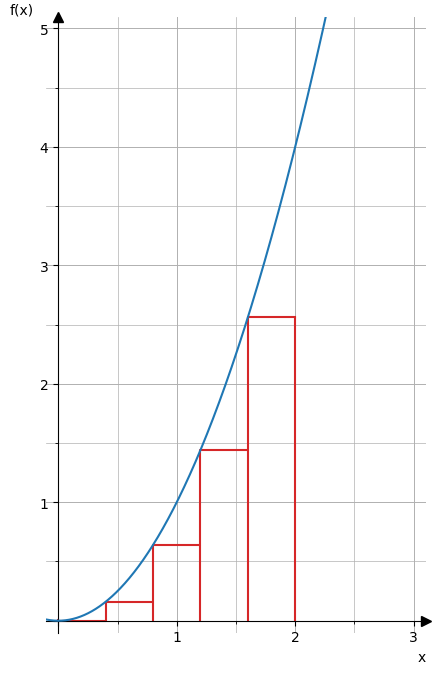

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# Defintionsmenge und Funktion
# ----------------------------
a= -0.1 # untere x-Intervallgrenze 
b= 3.1 # obere x-Intervallgrenze
c = -0.1# untere y-Intervallgrenze
d = 5.1 # obere y-Intervallgrenze
x = np.linspace(a, b,1000)
y1=x**2

def f(x):
    return x**2

n= 6
xi=np.linspace(0,2,n)
yi=f(x)
unten=np.zeros(n)
for i in range(len(unten)-1): 
    cx = np.linspace(xi[i], xi[i+1], 50)
    cy = f(cx)
    unten[i+1] = np.min(cy)
 
unten[0] = yi[0]   

# ----------------------------

# Einstellung des Graphen
fig=plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1, aspect =1)

# Definiton der Haupteinheiten, reele Zahlen ohne die 0 
def major_tick(x, pos):
    if x==0:
        return ""
    return int(x)

# Achsenskalierung
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_formatter(FuncFormatter(major_tick))
ax.yaxis.set_major_formatter(FuncFormatter(major_tick))

# Position der Achsen im Schaubild
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_position('zero')

# Pfeile für die Achsen
ax.plot((1),(0), ls="", marker= ">", ms=7, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0),(1), ls="", marker= "^", ms=7, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

# Achsenlänge und Beschriftung
ax.set_xlim(a,b)
ax.set_ylim(c, d)
ax.set_xlabel("x", loc="right")
ax.set_ylabel("f(x)", loc="top", rotation=0)

# Kästchen
ax.grid(linestyle="-", which="major",linewidth=0.7, zorder=-10)
ax.grid(linestyle="-", which="minor",linewidth=0.5, zorder=-10)

# Plot der Funktion
ax.plot(x,y1, zorder=10)
plt.plot(xi, unten, drawstyle='steps-pre', c='C3')
plt.vlines(xi, ymin=0, ymax=unten, color = 'C3', alpha=1)
#plt.show()

**Untersumme:**

$$
\begin{align*}
U_N &=\frac{2}{n}\left( 0^2+\left( \frac{2}{n}\right)^2 + \left( 2 \cdot \frac{2}{n}\right)^2 + \left( 3 \cdot \frac{2}{n}\right)^2+...+ \left( (n-1) \frac{2}{n}\right)^2            \right)\\
&= \frac{2^3}{n^3}\left(1+2^2+3^2+ ... + (n-1)^2 \right)\\
&=\frac{8}{n^3}\cdot \frac{1}{6}(n-1)\cdot n \cdot (2n-1)\\
&= \frac{4}{3}\cdot \left(1-\frac{1}{n} \right)\cdot \left( 2-\frac{2}{n}\right)
\end{align*}
$$

**Grenzwert $n \rightarrow \infty $ der Untersumme**

$$
\begin{align*}
\lim_{n \to \infty} U_n &= \lim_{n \to \infty} \frac{4}{3} \cdot \left( 1-\frac{1}{n}\right) \cdot \left( 2-\frac{1}{n}\right)\\
 &= \frac{8}{3}
 \end{align*}$$

**Conclusio: Der Flächeninhalt beträgt**

$$
 \lim_{n \to \infty} U_n = \lim_{n \to \infty} O_n \frac{8}{3}
$$

<div style="border: 1px solid blue">

**Definition:**

Sei Funktion $f$ mit $f(x)\geq 0$ für $x \in [a, b]$ gegeben.  
Exisitieren für jede Untersummenfolge und Obersummenfolge die Grenzwerte
$$
\lim_{n \to \infty} U_n \text{ und } \lim_{n \to \infty} O_n
$$
und sind die Grenzwerte gleich, dann ist der gemeinsame Grenzwert der Inhalt der Fläche zwischen dem Schaubild von $f$ und der x-Achse über dem Intervall $[a, b]$.
</div> 


<br>
<div style="border: 1px solid blue">

**Definition:**

Eine Funktion $f$ heißt auf einem Intervall $I=[a, b]$ integrierbar, wenn gilt:
$$ \lim_{n \to \infty} U_n = \lim_{n \to \infty} O_n $$

</div>

**Bemerkung:** 

Wie sieht es für $f(x) \leq 0$ aus?  
Mit dieser Methode berechnet man den orientierten Flächeninhalt, d.h. Flächen oberhalb der x-Achse werden poitiv berrechnet. Flächen unterhalb der x-Achse werden negativ berechent. 

Möchte man Flächeninhalte unterhalb der x-Achse berechnen, verwendet man den Betrag des negativen Flächeninhalts.




<div style="border: 1px solid red">

**Satz:**

Jede stetige Funktion auf einem Intervall $I$ hat für jede beliebige Folge von Obersummen $O_N$ bzw. Untersummen $U_N$ ein-und-densleben Gernezwert.

Der Grenzwert ist unabhängig von der Wahl der Stellen und der Breite der Teilintervalle.
</div>


<div style="border: 1px solid blue">

**Definition:**

Gegeben:
- Eine Funktion $f$ auf einem Intervall $I=[a,b]$
- f ist stetig
- für alle $n \in \mathbb{N}$ sein $S_N$ eine Rechtecksumme mit der Breite $h=\frac{b-a}{n}$
Es gilt:

Der Grenzwert
$$
\lim_{n\to \infty} S_N
$$
heißt **Integral der Funktion** $f$ über dem Intervall $I= [a, b]$. Man schreibt:
$$
\lim_{n \to \infty} = \int_a^b{f(x)}dx
$$
$f(x)$ heißt Integrand
$x$ ist die Integrationsvariable
$a$ ist die untere Grenze
$b$ ist die obere Grenze.

</div>

**Bemerkung:**

1. Das Integralzeichen geht  auf G.W. Leibnitz zurück. Es symbolisiert ein langestrecktes S für die Rechtecksummen.

2. Es gilt:
$$
\int_a^b{f(x)}dx = -\int_b^a{f(x)}dx
$$

3. $I=[a, b]$, und $a < c < b$. Es gilt die Intervalladditivität:
$$
\int_a^c{f(x)}dx + \int_c^b{f(x)}dx = \int_b^a{f(x)}dx
$$

4.
$$
\int_a^b{f(x)}dx + \int_b^a{f(x)}dx = \int_a^a{f(x)}dx = 0
$$

$$


$$